In [2]:
# Hard Drive Predictive Maintenance
## Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import glob

sample_files = glob.glob("../data/raw/data_Q3_2025/*.csv")[:1]
sample = pd.read_csv(sample_files[0], nrows=5)

sample.columns

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'datacenter', 'cluster_id', 'vault_id', 'pod_id', 'pod_slot_num',
       ...
       'smart_250_normalized', 'smart_250_raw', 'smart_251_normalized',
       'smart_251_raw', 'smart_252_normalized', 'smart_252_raw',
       'smart_254_normalized', 'smart_254_raw', 'smart_255_normalized',
       'smart_255_raw'],
      dtype='object', length=197)

In [3]:
files = glob.glob("../data/raw/data_Q3_2025/*.csv")[:10]

important_smarts = [
    "smart_5_raw",    # Reallocated sectors
    "smart_9_raw",    # Power-on hours
    "smart_187_raw",  # Reported uncorrectable
    "smart_188_raw",  # Command timeout
    "smart_197_raw",  # Pending sectors
    "smart_198_raw"   # Offline uncorrectable
]

use_cols = [
    "date",
    "serial_number",
    "model",
    "capacity_bytes",
    "failure"
] + important_smarts

In [4]:
df = pd.concat(
    (pd.read_csv(f, usecols=use_cols) for f in files),
    ignore_index=True
)

df.shape

(3223593, 11)

In [5]:
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw
0,2025-07-01,2207E60CC65A,CT250MX500SSD1,250059350016,0,0.0,21151.0,0.0,NaN,0.0,0.0
1,2025-07-01,2340E87B92B5,CT250MX500SSD1,250059350016,0,0.0,7720.0,0.0,NaN,0.0,0.0
2,2025-07-01,2340E87B97E8,CT250MX500SSD1,250059350016,0,0.0,2836.0,0.0,NaN,0.0,0.0
3,2025-07-01,2EGK64VX,HGST HUH728080ALE604,8001563222016,0,0.0,36884.0,NaN,NaN,0.0,0.0
4,2025-07-01,2EHZAKAX,HGST HUH728080ALE604,8001563222016,0,0.0,75481.0,NaN,NaN,0.0,0.0


In [6]:
df[important_smarts].isna().mean().sort_values(ascending=False)

smart_188_raw    0.655199
smart_187_raw    0.653395
smart_197_raw    0.026940
smart_198_raw    0.008002
smart_5_raw      0.007019
smart_9_raw      0.001338
dtype: float64

In [7]:
df["failure"].value_counts(normalize=True)

failure
0    0.999967
1    0.000033
Name: proportion, dtype: float64

In [8]:
df[important_smarts].describe()

,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw
count,3.200968e+06,3.219280e+06,1.117315e+06,1.111497e+06,3.136748e+06,3.197797e+06
mean,4.528874e+01,2.909618e+04,5.265686e+00,1.089977e+09,1.510646e+00,8.835567e-01
std,1.146370e+03,1.856777e+04,3.886794e+02,2.061174e+10,7.592412e+01,5.885658e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.293100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.970800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,4.137400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.552800e+04,1.069090e+05,6.553500e+04,2.207647e+12,6.493600e+04,6.493600e+04


In [9]:
sample_serial = df["serial_number"].iloc[0]

disk = df[df["serial_number"] == sample_serial]
disk

,date,serial_number,model,capacity_bytes,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw
0,2025-07-01,2207E60CC65A,CT250MX500SSD1,250059350016,0,0.0,21151.0,0.0,NaN,0.0,0.0
321792,2025-07-02,2207E60CC65A,CT250MX500SSD1,250059350016,0,0.0,21174.0,0.0,NaN,0.0,0.0
644288,2025-07-03,2207E60CC65A,CT250MX500SSD1,250059350016,0,0.0,21198.0,0.0,NaN,0.0,0.0
966733,2025-07-04,2207E60CC65A,CT250MX500SSD1,250059350016,0,0.0,21221.0,0.0,NaN,0.0,0.0
1289223,2025-07-05,2207E60CC65A,CT250MX500SSD1,250059350016,0,0.0,21245.0,0.0,NaN,0.0,0.0
1611607,2025-07-06,2207E60CC65A,CT250MX500SSD1,250059350016,0,0.0,21280.0,0.0,NaN,0.0,0.0
1934006,2025-07-07,2207E60CC65A,CT250MX500SSD1,250059350016,0,0.0,21304.0,0.0,NaN,0.0,0.0
2256346,2025-07-08,2207E60CC65A,CT250MX500SSD1,250059350016,0,0.0,21327.0,0.0,NaN,0.0,0.0
2578621,2025-07-09,2207E60CC65A,CT250MX500SSD1,250059350016,0,0.0,21351.0,0.0,NaN,0.0,0.0
2901062,2025-07-10,2207E60CC65A,CT250MX500SSD1,250059350016,0,0.0,21374.0,0.0,NaN,0.0,0.0


<Axes: xlabel='date'>

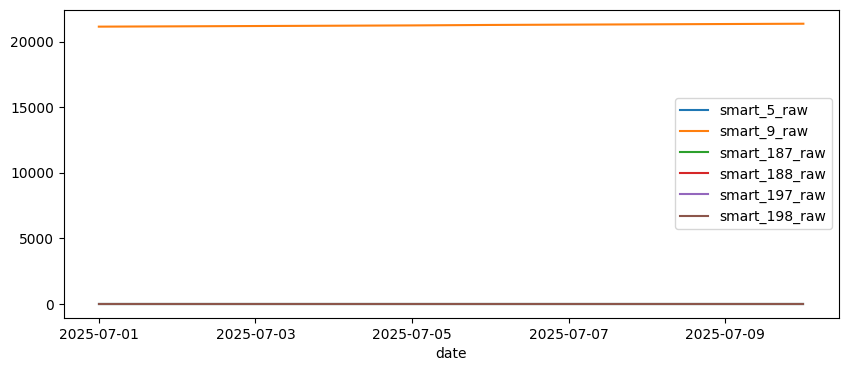

In [10]:
disk.plot(
    x="date",
    y=important_smarts,
    figsize=(10, 4)
)

In [11]:
failed = (
    df[df["failure"] == 1]
    .groupby("serial_number")["date"]
    .min()
)

df["serial_number"] = df["serial_number"].astype(str)
failed.index = failed.index.astype(str)

df["date_fail"] = df["serial_number"].map(failed)

df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["date_fail"] = pd.to_datetime(df["date_fail"], errors="coerce")

df["days_before_fail"] = (df["date_fail"] - df["date"]).dt.days


<Axes: xlabel='days_before_fail'>

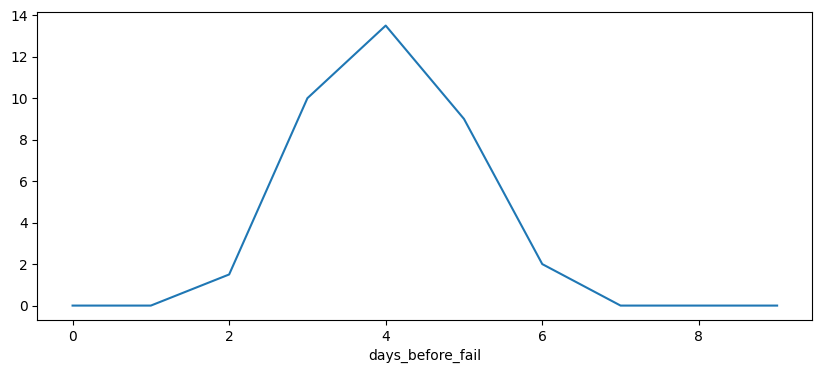

In [12]:
plot_df = (
    df[
        (df["days_before_fail"] >= 0) &
        (df["days_before_fail"] <= 14)
    ]
    .groupby("days_before_fail")["smart_5_raw"]
    .median()
)

plot_df.plot(figsize=(10, 4))


<Axes: xlabel='days_before_fail'>

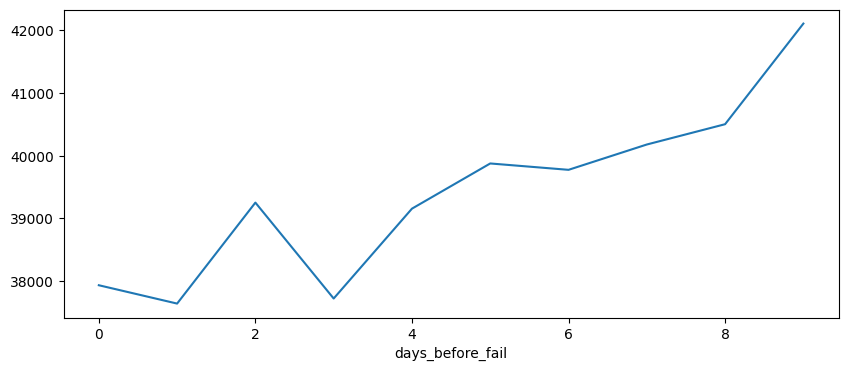

In [13]:
plot_df = (
    df[
        (df["days_before_fail"] >= 0) &
        (df["days_before_fail"] <= 14)
    ]
    .groupby("days_before_fail")["smart_9_raw"]
    .mean()
)

plot_df.plot(figsize=(10, 4))

<Axes: xlabel='days_before_fail'>

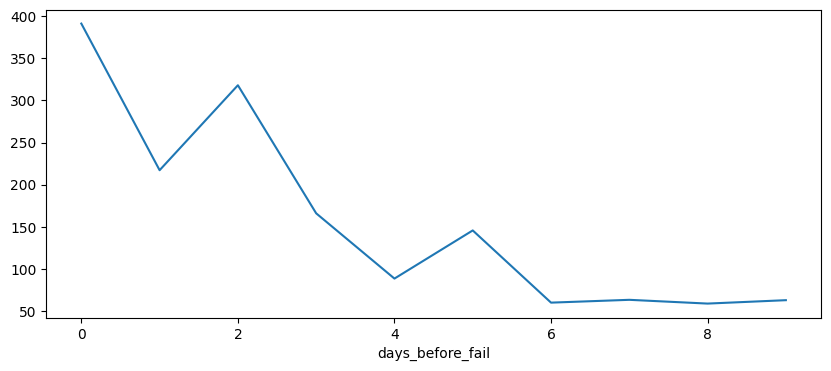

In [14]:
plot_df = (
    df[
        (df["days_before_fail"] >= 0) &
        (df["days_before_fail"] <= 14)
    ]
    .groupby("days_before_fail")["smart_187_raw"]
    .mean()
)

plot_df.plot(figsize=(10, 4))

<Axes: xlabel='days_before_fail'>

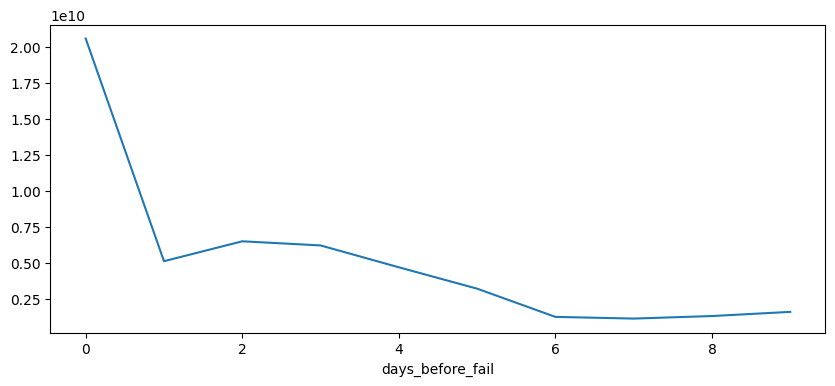

In [15]:
plot_df = (
    df[
        (df["days_before_fail"] >= 0) &
        (df["days_before_fail"] <= 14)
    ]
    .groupby("days_before_fail")["smart_188_raw"]
    .mean()
)

plot_df.plot(figsize=(10, 4))

<Axes: xlabel='days_before_fail'>

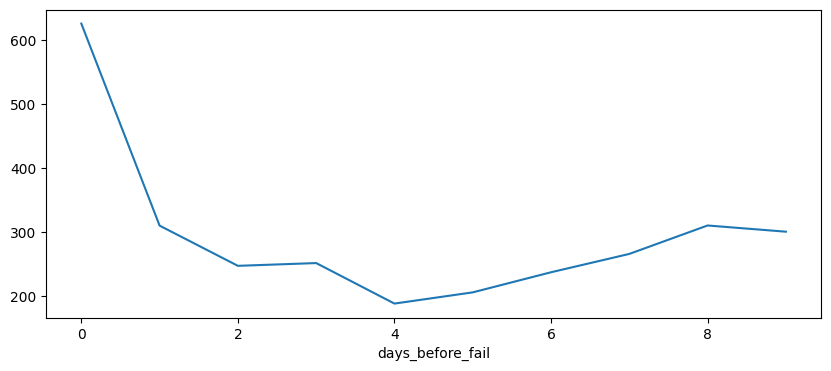

In [16]:
plot_df = (
    df[
        (df["days_before_fail"] >= 0) &
        (df["days_before_fail"] <= 14)
    ]
    .groupby("days_before_fail")["smart_197_raw"]
    .mean()
)

plot_df.plot(figsize=(10, 4))

<Axes: xlabel='days_before_fail'>

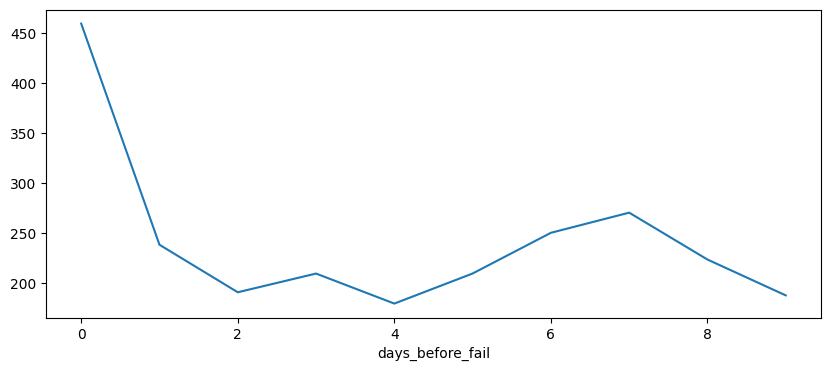

In [17]:
plot_df = (
    df[
        (df["days_before_fail"] >= 0) &
        (df["days_before_fail"] <= 14)
    ]
    .groupby("days_before_fail")["smart_198_raw"]
    .mean()
)

plot_df.plot(figsize=(10, 4))

In [18]:
df.groupby("failure")[important_smarts].median()

,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw
failure,,,,,,
0,0.0,29708.0,0.0,0.0,0.0,0.0
1,0.0,38516.0,104.5,0.0,2.0,0.0


In [19]:
df.groupby("failure")[important_smarts].mean()

,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw
failure,,,,,,
0,45.130616,29095.901653,5.252552,1.089311e+09,1.494930,0.868797
1,4959.203883,37930.058252,391.421053,2.057148e+10,625.518987,459.116505


In [20]:
df[important_smarts].corr()

,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw
smart_5_raw,1.000000,0.046887,0.053478,0.007215,0.022635,0.029230
smart_9_raw,0.046887,1.000000,-0.003990,0.007324,0.007377,0.010331
smart_187_raw,0.053478,-0.003990,1.000000,0.004267,0.026863,0.026863
smart_188_raw,0.007215,0.007324,0.004267,1.000000,0.003381,0.003381
smart_197_raw,0.022635,0.007377,0.026863,0.003381,1.000000,0.768339
smart_198_raw,0.029230,0.010331,0.026863,0.003381,0.768339,1.000000
